# **Impute Missing Values**


Estimated time needed: **30** minutes


In this lab, you will practice essential data wrangling techniques using the Stack Overflow survey dataset. The primary focus is on handling missing data and ensuring data quality. You will:

- **Load the Data:** Import the dataset into a DataFrame using the pandas library.

- **Clean the Data:** Identify and remove duplicate entries to maintain data integrity.

- **Handle Missing Values:** Detect missing values, impute them with appropriate strategies, and verify the imputation to create a complete and reliable dataset for analysis.

This lab equips you with the skills to effectively preprocess and clean real-world datasets, a crucial step in any data analysis project.


## Objectives


-   Identify missing values in the dataset.

-   Apply techniques to impute missing values in the dataset.
  
-   Use suitable techniques to normalize data in the dataset.


#### Install needed library


In [ ]:
!pip install pandas

### Step 1: Import Required Libraries


In [1]:
def import_libraries():
    """
    Imports required libraries for data analysis.
    """
    global pd, np, plt, sns
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Set plot styles
    sns.set(style='whitegrid', palette='deep')
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['axes.labelsize'] = 14

    print("Libraries imported successfully.")


In [2]:
import_libraries()

Libraries imported successfully.


### Step 2: Load the Dataset Into a Dataframe


In [7]:
def load_dataset(file_path):
    """
    Loads the dataset into a pandas DataFrame.

    Parameters:
        file_path (str): The path to the CSV file.

    Returns:
        pd.DataFrame: The loaded DataFrame.
    """
    try:
        df = pd.read_csv(file_path)
        print(f"Dataset loaded successfully. Shape: {df.shape}")
        return df
    except FileNotFoundError:
        print("File not found. Please check the file path.")
        return None


In [8]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"  # Update with your actual file path
df = load_dataset(file_path)

Dataset loaded successfully. Shape: (65437, 114)


### Step 3. Finding and Removing Duplicates
##### Task 1: Identify duplicate rows in the dataset.


In [14]:
def identify_duplicates(df):
    """
    Identifies duplicate rows in the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame to check for duplicates.

    Returns:
        pd.DataFrame: DataFrame containing duplicate rows.
        int: Number of duplicate rows.
    """
    duplicates = df[df.duplicated()]
    num_duplicates = duplicates.shape[0]
    print(f"Number of duplicate rows: {num_duplicates}")
    return duplicates, num_duplicates


In [15]:
duplicates, num_duplicates = identify_duplicates(df)

Number of duplicate rows: 0


**Function to Identify Duplicate Rows Based on Specific Columns**

In [11]:
def identify_duplicates(df, subset_columns):
    """
    Identifies duplicate rows in the DataFrame based on specified columns.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        subset_columns (list): List of column names to consider when identifying duplicates.

    Returns:
        duplicates_df (pd.DataFrame): DataFrame containing duplicate rows.
        num_duplicates (int): Number of duplicate rows found.
    """
    # Find duplicate rows based on the subset of columns
    duplicate_mask = df.duplicated(subset=subset_columns, keep=False)
    duplicates_df = df[duplicate_mask].copy()

    # Count the number of duplicate rows
    num_duplicates = duplicates_df.shape[0]

    # Sort duplicates for better readability
    duplicates_df.sort_values(by=subset_columns, inplace=True)

    # Display the number of duplicates found
    print(f"Number of duplicate rows based on columns {subset_columns}: {num_duplicates}")

    return duplicates_df, num_duplicates


##### Task 2: Remove the duplicate rows from the dataframe.



In [16]:
def remove_duplicates(df):
    """
    Removes duplicate rows from the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame to remove duplicates from.

    Returns:
        pd.DataFrame: DataFrame with duplicates removed.
    """
    initial_shape = df.shape
    df.drop_duplicates(inplace=True)
    final_shape = df.shape
    print(f"Duplicates removed. DataFrame shape changed from {initial_shape} to {final_shape}.")
    return df


In [17]:
df = remove_duplicates(df)

Duplicates removed. DataFrame shape changed from (65437, 114) to (65437, 114).


### Step 4: Finding Missing Values
##### Task 3: Find the missing values for all columns.


In [18]:
def find_missing_values(df):
    """
    Finds the number of missing values in each column.

    Parameters:
        df (pd.DataFrame): The DataFrame to check for missing values.

    Returns:
        pd.Series: Series with counts of missing values per column.
    """
    missing_values = df.isnull().sum()
    print("Missing values per column:")
    print(missing_values[missing_values > 0])
    return missing_values


In [19]:
missing_values = find_missing_values(df)

Missing values per column:
RemoteWork             10631
CodingActivities       10971
EdLevel                 4653
LearnCode               4949
LearnCodeOnline        16200
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 109, dtype: int64


##### Task 4: Find out how many rows are missing in the column RemoteWork.


In [20]:
def missing_in_column(df, column_name):
    """
    Finds the number of missing values in a specific column.

    Parameters:
        df (pd.DataFrame): The DataFrame to check.
        column_name (str): The column to inspect.

    Returns:
        int: Number of missing values in the column.
    """
    missing_count = df[column_name].isnull().sum()
    print(f"Number of missing values in '{column_name}': {missing_count}")
    return missing_count


In [21]:
missing_remote_work = missing_in_column(df, 'RemoteWork')


Number of missing values in 'RemoteWork': 10631


### Step 5. Imputing Missing Values
##### Task 5: Find the value counts for the column RemoteWork.


In [22]:
def value_counts_column(df, column_name):
    """
    Finds the value counts for a specific column.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        column_name (str): The column to analyze.

    Returns:
        pd.Series: Series of value counts.
    """
    value_counts = df[column_name].value_counts()
    print(f"Value counts for '{column_name}':")
    print(value_counts)
    return value_counts

In [23]:
remote_work_counts = value_counts_column(df, 'RemoteWork')

Value counts for 'RemoteWork':
RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64


##### Task 6: Identify the most frequent (majority) value in the RemoteWork column.



In [24]:
def most_frequent_value(df, column_name):
    """
    Identifies the most frequent value in a specific column.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        column_name (str): The column to analyze.

    Returns:
        The most frequent value in the column.
    """
    mode_value = df[column_name].mode()[0]
    print(f"The most frequent value in '{column_name}' is: '{mode_value}'")
    return mode_value


In [25]:

most_frequent_remote_work = most_frequent_value(df, 'RemoteWork')

The most frequent value in 'RemoteWork' is: 'Hybrid (some remote, some in-person)'


##### Task 7: Impute (replace) all the empty rows in the column RemoteWork with the majority value.



In [26]:
def impute_missing_values(df, column_name, value):
    """
    Imputes missing values in a column with a specified value.

    Parameters:
        df (pd.DataFrame): The DataFrame to modify.
        column_name (str): The column to impute.
        value: The value to replace missing data with.

    Returns:
        pd.DataFrame: DataFrame with imputed values.
    """
    missing_before = df[column_name].isnull().sum()
    df[column_name].fillna(value, inplace=True)
    missing_after = df[column_name].isnull().sum()
    print(f"Imputed missing values in '{column_name}'. Missing before: {missing_before}, Missing after: {missing_after}")
    return df


In [27]:
df = impute_missing_values(df, 'RemoteWork', most_frequent_remote_work)

Imputed missing values in 'RemoteWork'. Missing before: 10631, Missing after: 0


C:\Users\tdhoa\AppData\Local\Temp\ipykernel_26172\2041377184.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].fillna(value, inplace=True)


##### Task 8: Check for any compensation-related columns and describe their distribution.



In [28]:
def analyze_compensation_columns(df):
    """
    Identifies compensation-related columns and describes their distribution.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.

    Returns:
        dict: A dictionary with column names as keys and their descriptive statistics as values.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    compensation_stats = {}
    compensation_columns = [col for col in df.columns if 'comp' in col.lower() or 'salary' in col.lower()]
    
    if not compensation_columns:
        print("No compensation-related columns found.")
        return compensation_stats
    
    for col in compensation_columns:
        if df[col].dtype in ['int64', 'float64']:
            stats = df[col].describe()
            compensation_stats[col] = stats
            print(f"\nDescriptive statistics for '{col}':")
            print(stats)
            
            # Plot distribution
            plt.figure(figsize=(10, 6))
            sns.histplot(df[col].dropna(), bins=50, kde=True, color='skyblue')
            plt.title(f"Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.show()
        else:
            print(f"\nColumn '{col}' is not numerical and cannot be described statistically.")
    return compensation_stats



Descriptive statistics for 'CompTotal':
count     3.374000e+04
mean     2.963841e+145
std      5.444117e+147
min       0.000000e+00
25%       6.000000e+04
50%       1.100000e+05
75%       2.500000e+05
max      1.000000e+150
Name: CompTotal, dtype: float64


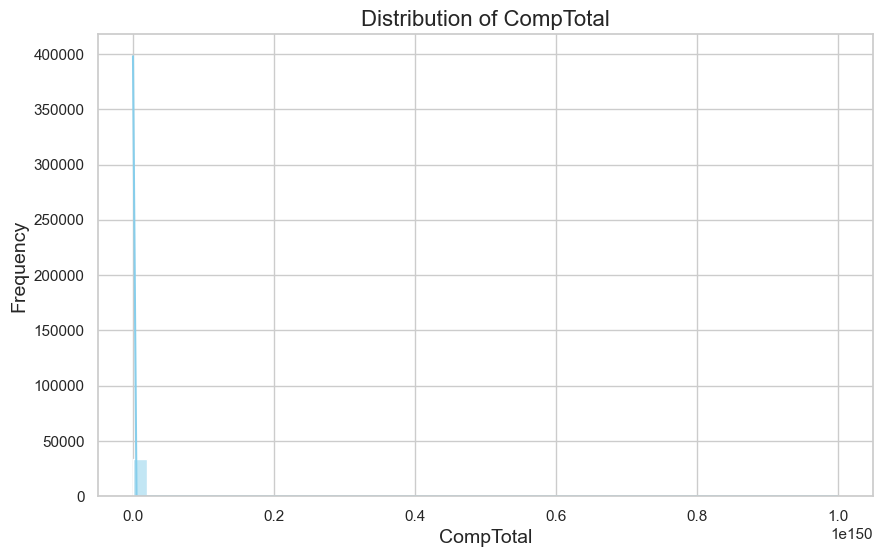


Column 'AIComplex' is not numerical and cannot be described statistically.

Descriptive statistics for 'ConvertedCompYearly':
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


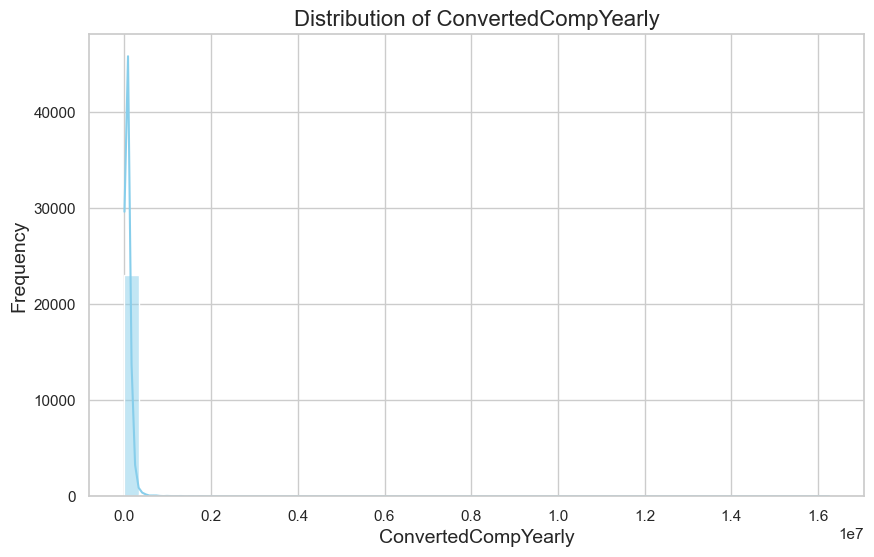

In [29]:
compensation_statistics = analyze_compensation_columns(df)